## Importando as bibliotecas necessarias

In [29]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
#from itertools import chain
import itertools
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Carregando os dados de treinamento

In [30]:
df_train = pd.read_csv('IMDB_train.csv')

#### Mostrando as 10 primeiras linhas

In [31]:
df_train.head(10)

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
5,Pos,when i first heard of contact the hype was ...
6,Pos,you ve got to love disney no matter what t...
7,Pos,with three pre to mid teen children and an a...
8,Pos,i hate to burst your bubble but after all t...
9,Pos,susan granger s review of osmosis jones ...


#### Mostrando o nome das colunas

In [32]:
df_train.columns

Index(['class', 'text'], dtype='object')

#### Renomeando o nome das colunas

In [33]:
df_train = df_train.rename(columns={'class': 'tipo', 'text': 'critica'})

#### Transformando o target "tipo" para 0 - Neg e 1 - Pos

In [34]:
df_train['tipo']=df_train['tipo'].map({"Pos":1,"Neg":0})
df_train.head()

,tipo,critica
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


#### Verifica se estao faltando valores

In [35]:
df_train.isna().sum()

tipo       0
critica    0
dtype: int64

#### Verificar se a quantidade de dados do target (tipo da critica) esta balanceada

1    800
0    800
Name: tipo, dtype: int64


<AxesSubplot: ylabel='tipo'>

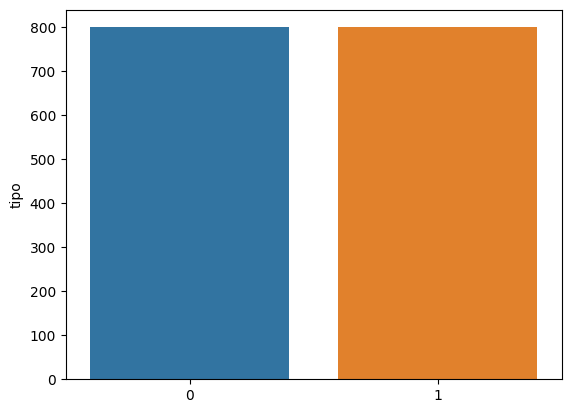

In [36]:
tipo_count = df_train['tipo'].value_counts()
print(tipo_count)
sns.barplot(x=tipo_count.index, y=tipo_count)

In [37]:
critica, tipo = df_train.critica, df_train.tipo

In [38]:
print(critica)
print(tipo)

0        a common complaint amongst film critics is   ...
1        whew   this film oozes energy   the kind of b...
2        steven spielberg s   amistad     which is bas...
3        he has spent his entire life in an awful litt...
4        being that it is a foreign language film with...
                              ...                        
1595     if anything     stigmata   should be taken as...
1596     john boorman s   zardoz   is a goofy cinemati...
1597     the kids in the hall are an acquired taste   ...
1598     there was a time when john carpenter was a gr...
1599     two party guys bob their heads to haddaway s ...
Name: critica, Length: 1600, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: tipo, Length: 1600, dtype: int64


In [45]:
documents = []

stemmer = WordNetLemmatizer()
def pre_processamento(document):

    for i in range(0, len(critica)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(critica[i]))
        
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        
        # Converting to Lowercase
        document = document.lower()
        
        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)

def stopword(word):
    a= [i for i in word.split() if i not in stopwords.words('english')]
    return ' '.join(a)
        

In [47]:
def finalpreprocess(string):
    return stopword(pre_processamento(string))

df_train['clean_text'] = df_train['critica'].apply(lambda x: finalpreprocess(x))
df_train.head()

AttributeError: 'NoneType' object has no attribute 'split'

In [44]:
df_train['Clean data'] = df_train['critica'].apply(lambda x: documents(x))
df_train.head(5)

TypeError: 'list' object is not callable

In [41]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
